# Assignment: Regression on the Diabetes Dataset

Here we will practice doing regression with [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).  (Throughout the following, you are welcome to add additional cells if you need them for coding.)

Execute the following cell to get us started.

In [1]:
# Import scikit-learn's example diabetes dataset
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()

# Print a description of the dataset
print(diabetes.DESCR)

# Get the feature and target arrays
x = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## ML steps

* `x` is now a numpy array containing 10 features and 442 records (corresponding to 442 patients).  
* `y` is a numpy array containing the target values
  * as in the description, `y` is a quantitative measure of disease progression one year after baseline.

Print the array dimensions of x and y and confirm that the dimensions match the sizes above.

In [2]:
print(f'Dimensions of x: {x.shape}')
print(f'Dimensions of y: {y.shape}')

if x.shape == (442, 10):
  print('x has the correct dimensions (442 records, 10 features).')
else:
  print('x does not have the correct dimensions.')

if y.shape == (442,):
  print('y has the correct dimensions (442 records).')
else:
  print('y does not have the correct dimensions.')

Dimensions of x: (442, 10)
Dimensions of y: (442,)
x has the correct dimensions (442 records, 10 features).
y has the correct dimensions (442 records).


Make scatter plots to look at the relationship between y and each feature of x

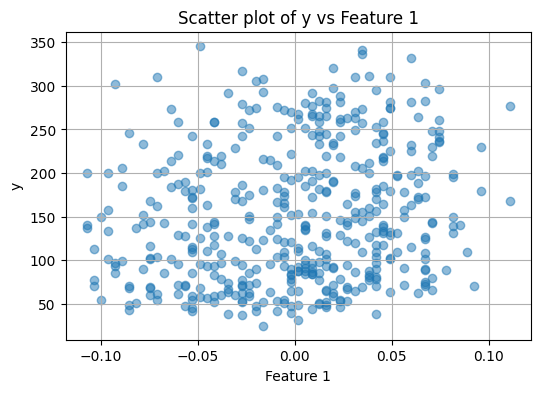

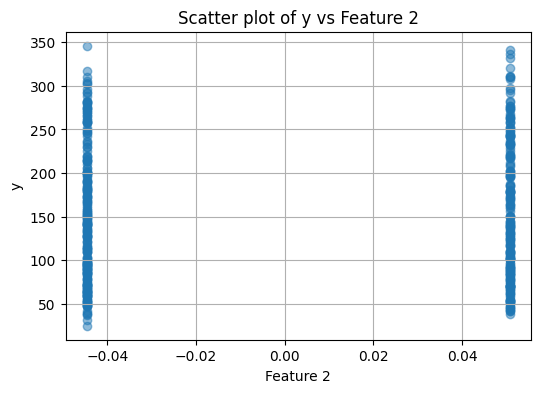

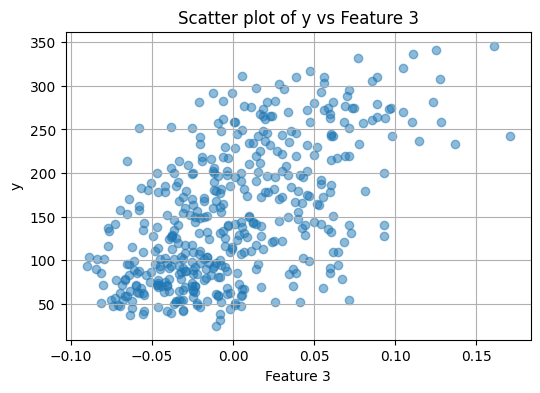

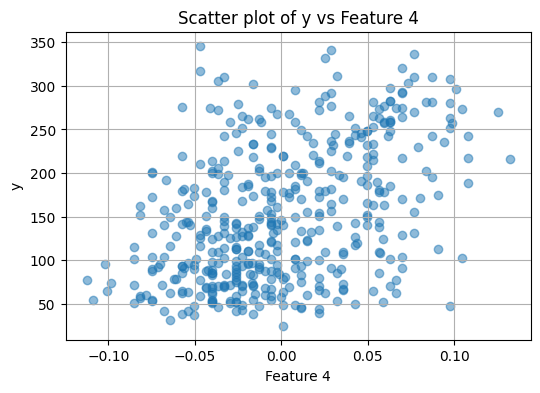

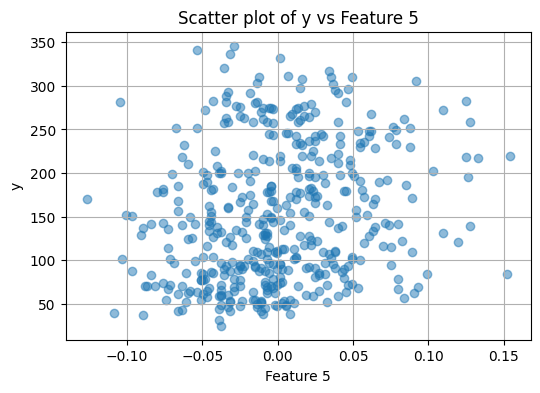

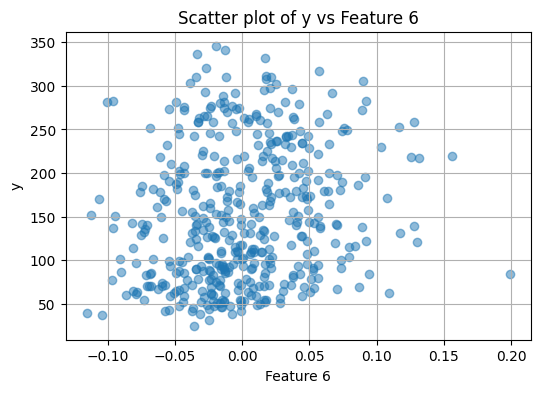

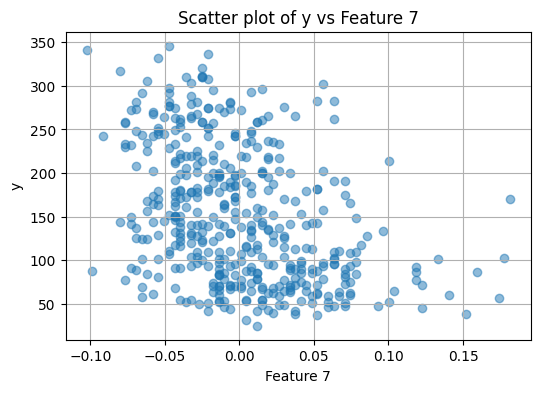

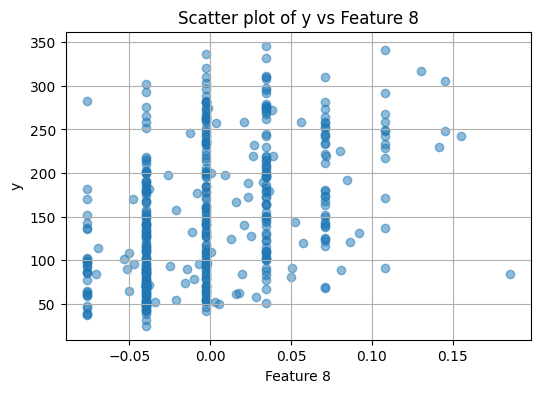

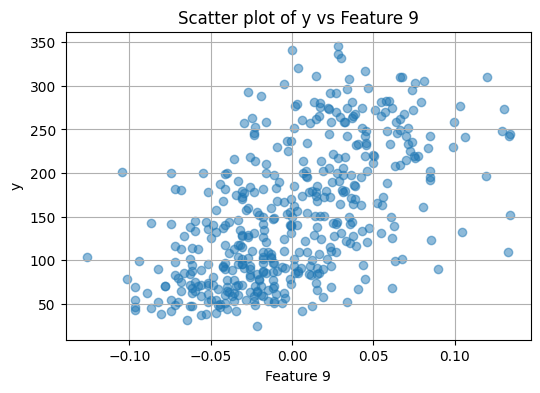

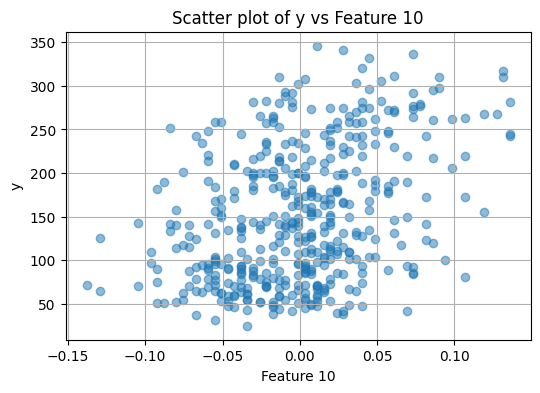

In [3]:
import matplotlib.pyplot as plt

for i in range(x.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(x[:, i], y, alpha=0.5)
    plt.title(f'Scatter plot of y vs Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

Write a loop that prints the 10 correlation coefficients between y and the 10 features in x.
* You may find it useful to use either [numpy's corrcoef method](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or [pandas dataframe corr method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) for calculating the correlation coefficient matrix.

In [4]:
import numpy as np

for i in range(x.shape[1]):
  correlation = np.corrcoef(x[:, i], y)[0, 1]
  print(f"Correlation coefficient between y and Feature {i+1}: {correlation:.4f}")

Correlation coefficient between y and Feature 1: 0.1879
Correlation coefficient between y and Feature 2: 0.0431
Correlation coefficient between y and Feature 3: 0.5865
Correlation coefficient between y and Feature 4: 0.4415
Correlation coefficient between y and Feature 5: 0.2120
Correlation coefficient between y and Feature 6: 0.1741
Correlation coefficient between y and Feature 7: -0.3948
Correlation coefficient between y and Feature 8: 0.4305
Correlation coefficient between y and Feature 9: 0.5659
Correlation coefficient between y and Feature 10: 0.3825


Perform linear regression using the feature in x that has the highest correlation coefficient with y

* State at the beginning what the name of the most correlated feature variable is, and whether this makes sense to you from your common sense knowledge about diabetes
  * The feature variable names are in the documentation above and accessible in the list `diabetes.feature_names`
* Split your data into a training set and a test set
* Train the model
* Print the coefficients of the model
* Plot the linear model as a red line on top of a scatter plot showing your training data as black circles and your test data as blue circles
* Print the mean squared error and R-squared values for your model applied to the test data

The most correlated feature with y is: bmi
This makes sense because 'bmi' (Body Mass Index) is a known significant risk factor for diabetes.
Coefficient of the linear model: 998.5777
Intercept of the linear model: 152.0034


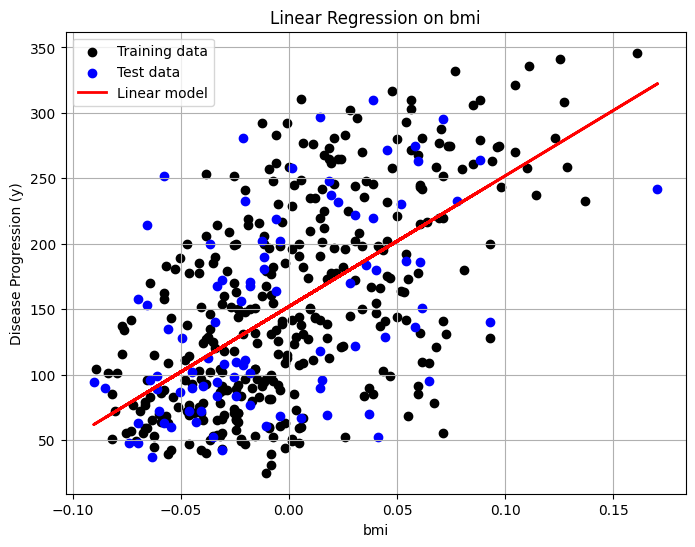

Mean Squared Error (MSE) on the test set: 4061.8259
R-squared (R2) on the test set: 0.2334


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

correlations = [np.corrcoef(x[:, i], y)[0, 1] for i in range(x.shape[1])]

most_correlated_feature_index = np.argmax(np.abs(correlations))
most_correlated_feature_name = diabetes.feature_names[most_correlated_feature_index]

print(f"The most correlated feature with y is: {most_correlated_feature_name}")
print("This makes sense because 'bmi' (Body Mass Index) is a known significant risk factor for diabetes.")

x_most_correlated = x[:, most_correlated_feature_index].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_most_correlated, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

print(f"Coefficient of the linear model: {model.coef_[0]:.4f}")
print(f"Intercept of the linear model: {model.intercept_:.4f}")

y_pred = model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Linear model')
plt.title(f'Linear Regression on {most_correlated_feature_name}')
plt.xlabel(most_correlated_feature_name)
plt.ylabel('Disease Progression (y)')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on the test set: {mse:.4f}")
print(f"R-squared (R2) on the test set: {r2:.4f}")

Repeat the linear regression steps, only now use all 10 features when doing your model fit.
* Note that when you pass any feature data like `x` into the fit method (like `fit(x,y)`), `x` is a 2D numpy array that has a size of number_of_samples by number_of_features. When training on one feature variable, `x` will have a size of number_of_samples by 1. If you train on n features, then `x` should have a size of number_of_samples by n.
* I don't expect you to plot anything this time, but print the mean squared error and R-squared values for your model applied to the test data.

In [6]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x, y, test_size=0.2, random_state=42)

model_all_features = LinearRegression()
model_all_features.fit(x_train_all, y_train_all)

y_pred_all_features = model_all_features.predict(x_test_all)

mse_all_features = mean_squared_error(y_test_all, y_pred_all_features)
r2_all_features = r2_score(y_test_all, y_pred_all_features)

print(f"Mean Squared Error (MSE) on the test set (all features): {mse_all_features:.4f}")
print(f"R-squared (R2) on the test set (all features): {r2_all_features:.4f}")

Mean Squared Error (MSE) on the test set (all features): 2900.1936
R-squared (R2) on the test set (all features): 0.4526


Compare your model's results against the results obtained when training on just

1.   List item
2.   List item

one feature.

The model trained with all 10 features has a lower Mean Squared Error, indicating better predictive accuracy.
The model trained with all 10 features has a higher R-squared value, indicating that it explains more of the variance in the target variable.
Based on MSE and R2, the model using all features performs better than the model using only the most correlated feature.

Repeat the regression one more time using all feature variables, but now:
* Use the k-nearest neighbors algorithm rather than linear regression
* When doing so, use cross-validation to obtain the optimal number of neighbors before training your final model

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, test_size=0.2, random_state=42)

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train_knn, y_train_knn, cv=5, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal number of neighbors (k) found using cross-validation: {optimal_k}")

knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(x_train_knn, y_train_knn)

y_pred_knn = knn_optimal.predict(x_test_knn)

mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
r2_knn = r2_score(y_test_knn, y_pred_knn)

print(f"Mean Squared Error (MSE) on the test set (KNN with optimal k={optimal_k}): {mse_knn:.4f}")
print(f"R-squared (R2) on the test set (KNN with optimal k={optimal_k}): {r2_knn:.4f}")

Optimal number of neighbors (k) found using cross-validation: 17
Mean Squared Error (MSE) on the test set (KNN with optimal k=17): 3003.3901
R-squared (R2) on the test set (KNN with optimal k=17): 0.4331


Compare the MSE and R$^2$ scores of k-nearest neighbors, linear regression with the most correlated feature, and multilinear regression with all features

In [9]:
print("\n--- Model Comparison ---")
print(f"Linear Regression (Most Correlated Feature - {most_correlated_feature_name}):")
print(f"  MSE: {mse:.4f}")
print(f"  R2: {r2:.4f}")
print("\nLinear Regression (All Features):")
print(f"  MSE: {mse_all_features:.4f}")
print(f"  R2: {r2_all_features:.4f}")
print(f"\nK-Nearest Neighbors (Optimal k={optimal_k}):")
print(f"  MSE: {mse_knn:.4f}")
print(f"  R2: {r2_knn:.4f}")


--- Model Comparison ---
Linear Regression (Most Correlated Feature - bmi):
  MSE: 4061.8259
  R2: 0.2334

Linear Regression (All Features):
  MSE: 2900.1936
  R2: 0.4526

K-Nearest Neighbors (Optimal k=17):
  MSE: 3003.3901
  R2: 0.4331


***Optional Bonus Part (2 extra points)***

Perform linear regression with all feature variables, but now use LASSO regularization with an alpha that results in zeroing out the coefficients of some features.
* Which features get zeroed out?
* Do you think it makes sense from a medical perspective to zero out those features?
* How does it affect the performance relative to linear regression without regularization?
* Can you find an alpha that gives improved performance?

## Submit

* Save your work (File -> Save Notebook)
* Verify that your notebook runs without error by restarting the kernel (or closing and opening the notebook) and selecting the top menu item for Run -> Run All Cells.  It should run successfully all the way to the bottom.
* Save your notebook again.  Keep all the output visible when saving the final version.
* Submit the file through the Canvas Assignment.